# Лабараторная работа №1
## Поэлементные преобразования изображений

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Считать цветное RGB изображение 

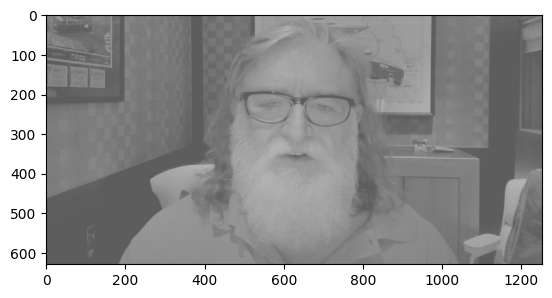

In [3]:
image = cv2.imread("data/gabe.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### 2. Преобразовать изображение в градации серого

$$ Y = 0.299R + 0.587G + 0.114B $$

In [4]:
def rgb2gray(image):
    return np.dot(image, [0.299, 0.587, 0.114]).astype(np.uint8)

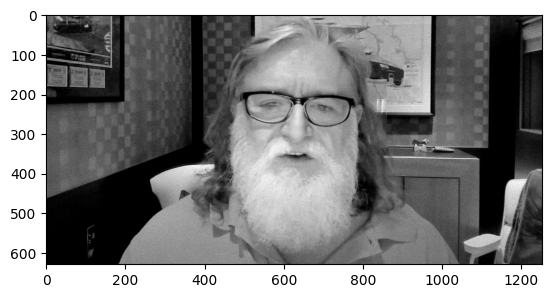

In [5]:
gray = rgb2gray(image)
gray = cv2.convertScaleAbs(gray)
plt.imshow(gray, cmap = "gray")
plt.show()

### 3. Написать функцию реализации поэлементной обработки изображения

In [6]:
def element_by_element(image: np.array, function):
    return np.array([[function(image[i][j]) for j in range(len(image[i]))] for i in range(len(image))]).astype(np.uint8)

### 4. По гистограмме изображения определить значение порога яркостей, обеспечивающего оптимальное разделение объекта и фона. Осуществить пороговую обработку входного изображения с найденным пороговым значением
- Вход: изображение из пункта 2
- Вывод: входное и результирующие изображение и их гистограммы соответственно
- Порог определить на глаз по гистограмме

In [7]:
def make_histogram(image: np.array) -> np.array:
    histogram = np.zeros((256))
    for i in range(len(image)):
        for j in range(len(image[i])):
            histogram[image[i][j]] += 1
    return histogram

In [8]:
def draw_hist_with_image(img: np.array):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.imshow(img, cmap = "gray")
    ax2.plot(make_histogram(img))
    plt.show()

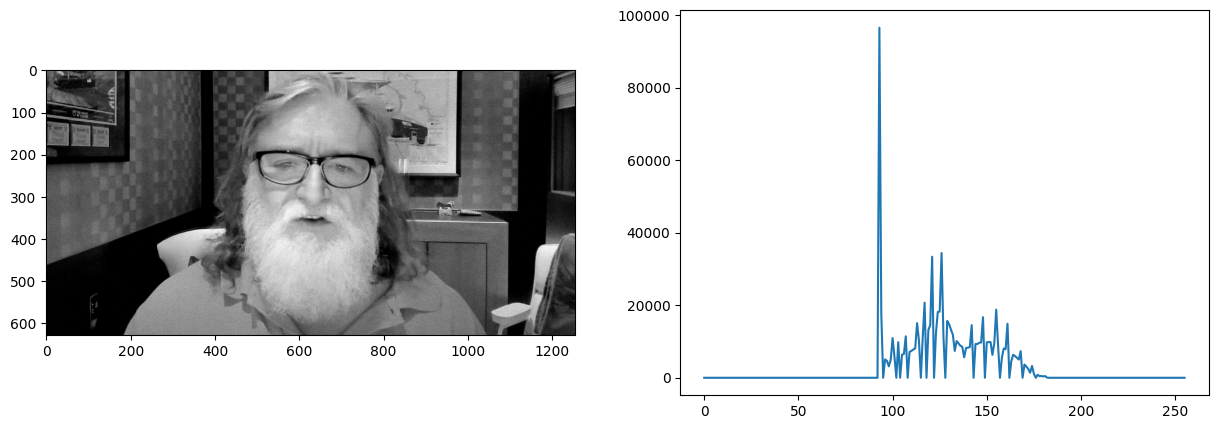

In [9]:
draw_hist_with_image(gray)

In [10]:
def threshold(target: int, x: int =126):
    return 255 if target > x else 0 

In [11]:
threshold_image = element_by_element(gray, threshold)

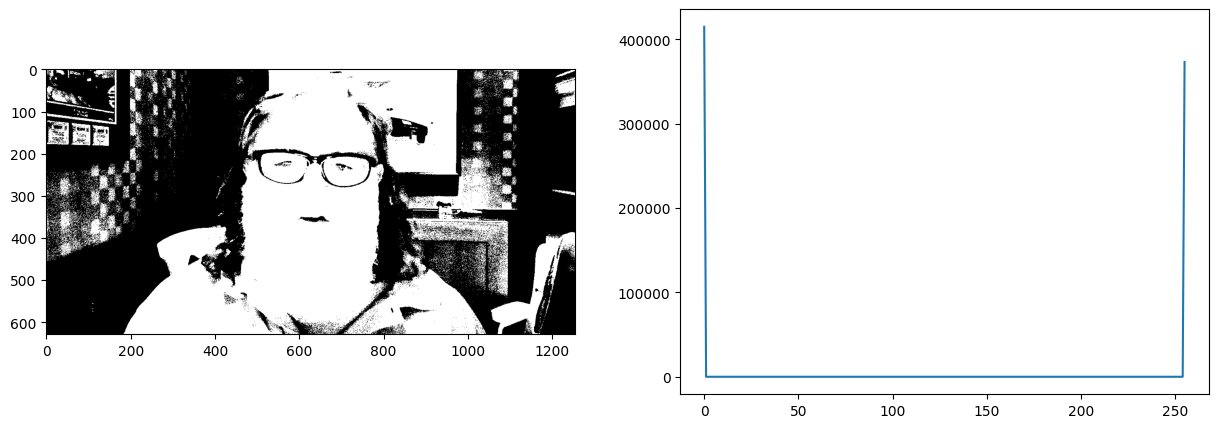

In [12]:
draw_hist_with_image(threshold_image)

### 5. Сделать пороговую обработку методом Otsu (Функция OpenCV)
- Вход: изображение из пункта 2
- Вывод: входное и результирующие изображение и их гистограммы соответственно

In [13]:
threshold_value, thresholded_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

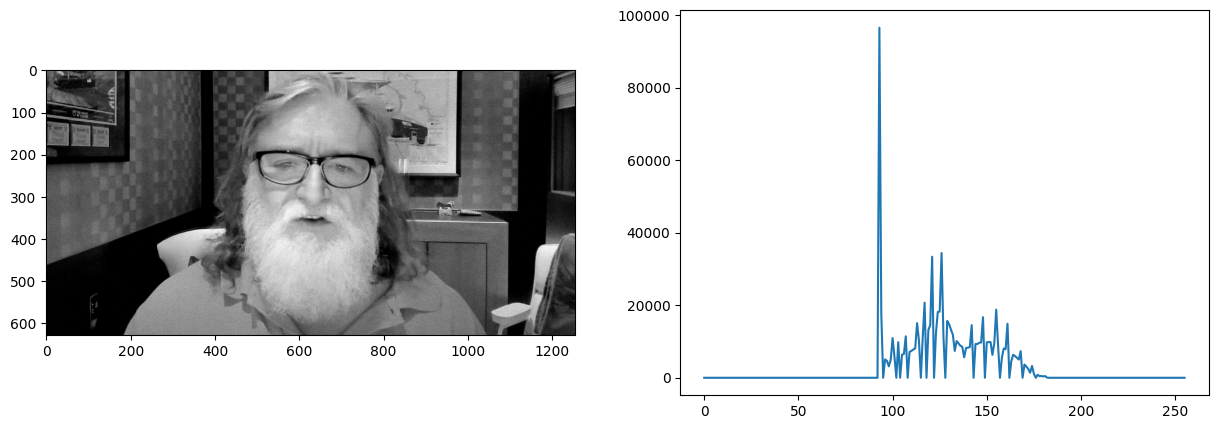

In [14]:
draw_hist_with_image(gray)

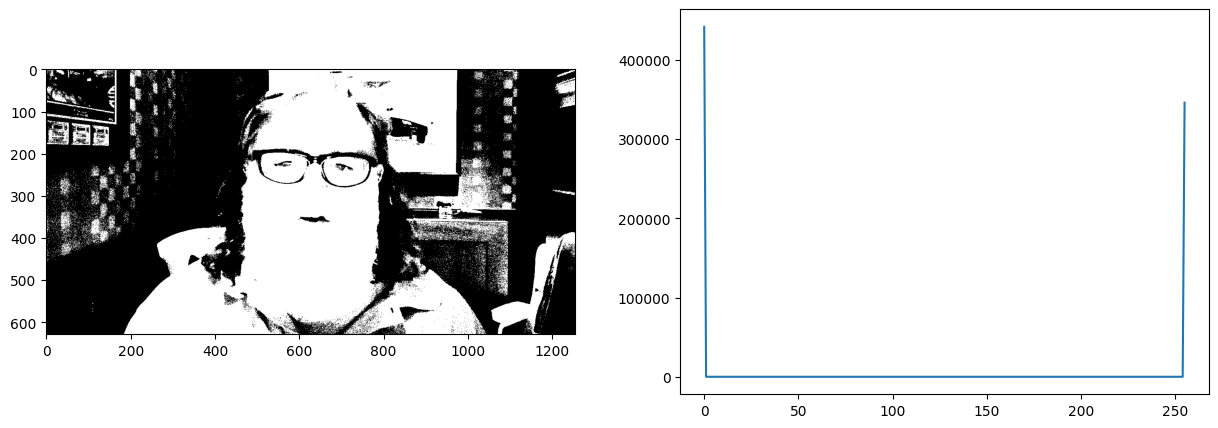

In [15]:
draw_hist_with_image(thresholded_img)

### 6. Определить динамический диапазон входного изображения. Осуществить линейное контрастирование входного изображения в заданный динамический диапазон яркостей
- Вход: изображение у которого диапазон не на всем промежутке [0,255] или использовать
- Вывод: входное и результирующие изображение и их гистограммы соответственно
- Вычислить коэффициенты a и b. Сделать преобразование вида g =a*f+b

In [16]:
def find_ranges(image: np.array):
    uniq = np.unique(image)
    return uniq[0], uniq[-1]

In [17]:
def linear_contrast(image, to_min, to_max):
    i_min, i_max = find_ranges(image)
    image = (image - i_min) / (i_max - i_min)
    image *= (to_max - to_min)
    image += to_min
    return image.astype(np.uint8)

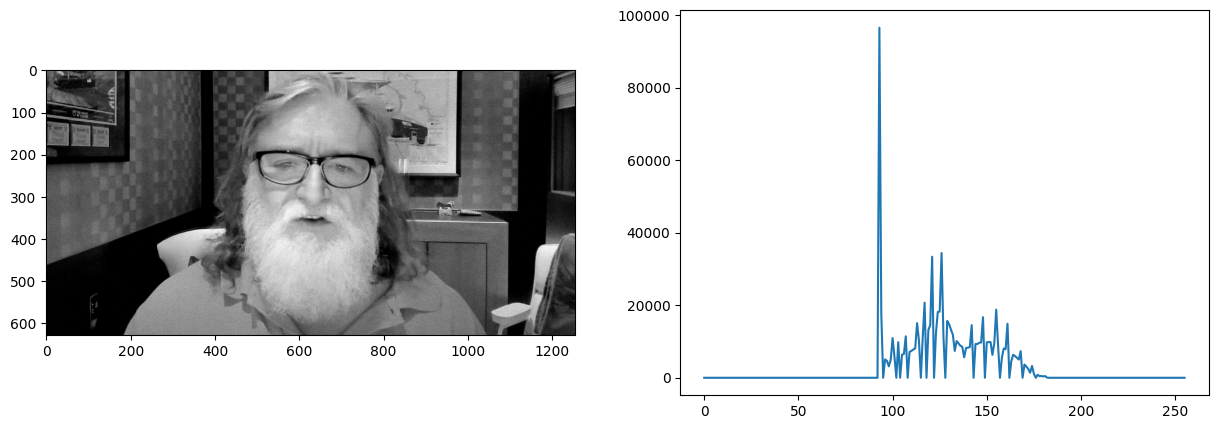

In [18]:
draw_hist_with_image(gray)

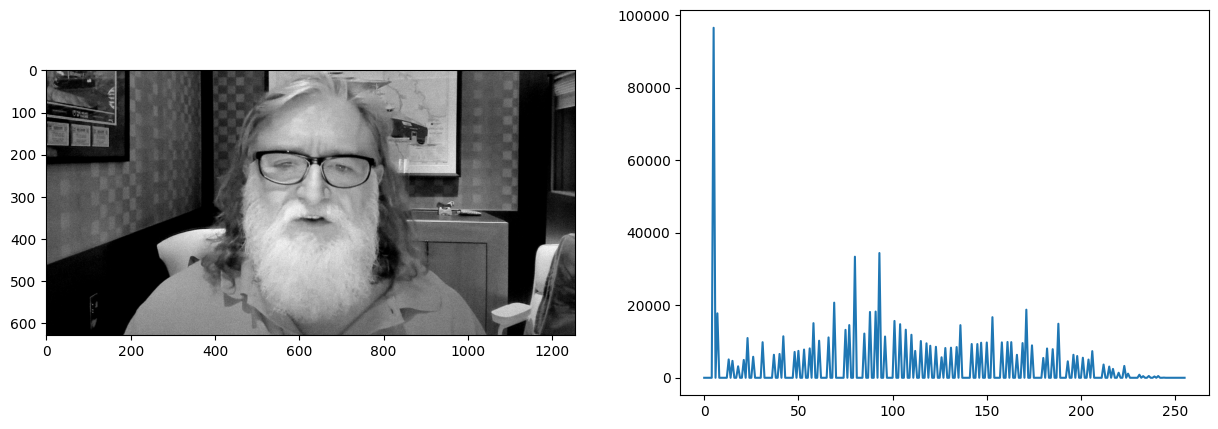

In [19]:
contrast_image = linear_contrast(gray, 5, 250)
draw_hist_with_image(contrast_image)

### 7. Сделать эквализацию гистограммы изображения
- Вход: изображение из пункта 2
- Вывод: входное и результирующие изображение и их гистограммы соответственно

In [20]:
def equalization_image(image: np.array):
    histogram = make_histogram(image)
    histogram = histogram / (image.shape[0] * image.shape[1])
    histogram = np.cumsum(histogram)
    histogram = (histogram * 255).astype(np.uint8)
    return histogram[gray]

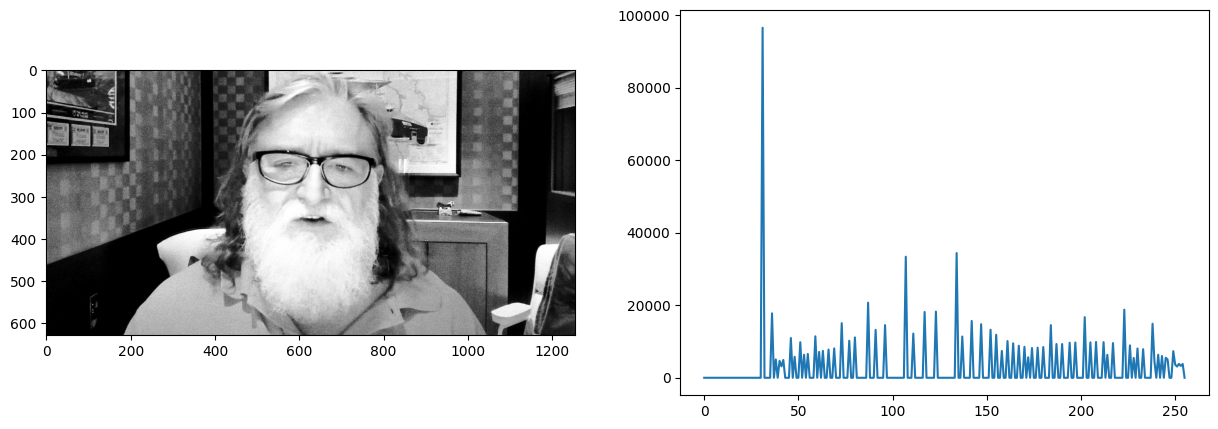

In [21]:
draw_hist_with_image(equalization_image(gray))

### 8.Сделать эквализацию методом CLAHE (Функция OpenCV)
- Вход: изображение из пункта 2
- Вывод: входное и результирующие изображение и их гистограммы соответственно

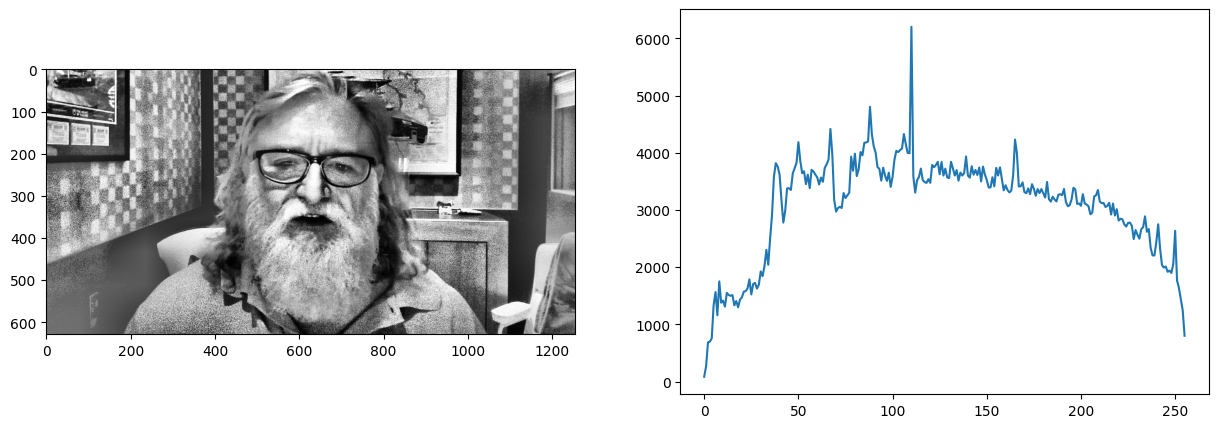

In [23]:
clahe = cv2.createCLAHE()
equalization_image = clahe.apply(gray)
draw_hist_with_image(equalization_image)

### 9. Осуществить препарирование изображения с заданной препарирующей функцией
- Вход: изображение из пункта 2
- Вывод: входное и результирующие изображение и их гистограммы соответственно. График препарирующий функции.
- Пороги в препарирующей функции выбирать самостоятельно

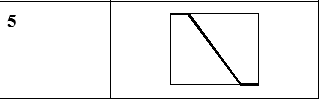

In [24]:
def dissecting(x: int, a: int = 90, b: int = 160):
    if x < a:
        return 255
    elif x > b:
        return 0
    else:
        return 255 - (255 / (b - a)) * (x - a)

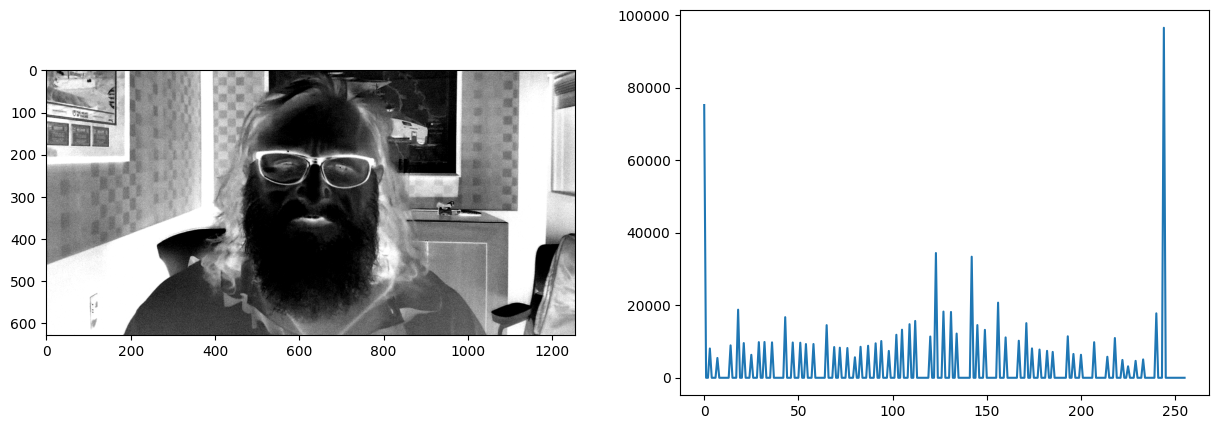

In [25]:
draw_hist_with_image(element_by_element(gray, dissecting))

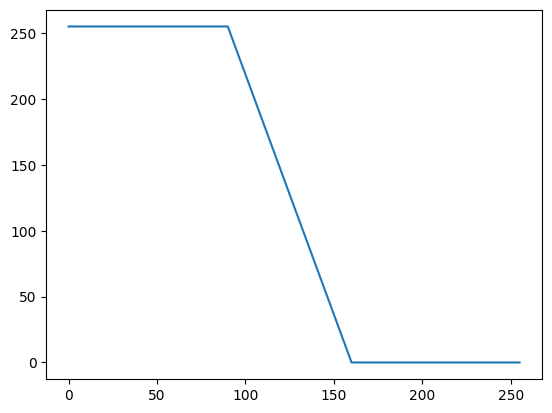

In [26]:
x = np.arange(256)
x = map(lambda y: dissecting(y), x)
plt.plot(list(x))